In [1]:
%matplotlib inline
DEFAULT_FIGSIZE = (16, 12)

import os
import pickle
import itertools
import sys

import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.lines as mlines
#import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('darkgrid', {'legend.frameon': True})
import pandas as pd

sys.path.append('..')
from antlia import trial2

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = DEFAULT_FIGSIZE
mpl.rcParams['legend.facecolor'] = 'white'

colors = sns.color_palette('Paired', 10)

In [3]:
records = trial2.load_records(all_riders=True)

loaded record from files: 2018-04-23_12-30-38.csv, 2018-04-23-12-17-37_0.pkl.gz
loaded record from files: 2018-04-23_13-13-36.csv, 2018-04-23-13-01-00_0.pkl.gz
loaded record from files: 2018-04-23_14-22-58.csv, 2018-04-23-14-10-33_0.pkl.gz
loaded record from files: 2018-04-23_15-27-48.csv, 2018-04-23-15-15-14_0.pkl.gz
loaded record from files: 2018-04-23_16-32-27.csv, 2018-04-23-16-19-35_0.pkl.gz
loaded record from files: 2018-04-23_17-14-00.csv, 2018-04-23-17-01-24_0.pkl.gz
loaded record from files: 2018-04-25_09-27-24.csv, 2018-04-25-09-15-00_0.pkl.gz
loaded record from files: 2018-04-25_10-20-28.csv, 2018-04-25-10-07-31_0.pkl.gz
loaded record from files: 2018-04-25_11-34-04.csv, 2018-04-25-11-21-29_0.pkl.gz
loaded record from files: 2018-04-25_12-41-48.csv, 2018-04-25-12-29-06_0.pkl.gz
loaded record from files: 2018-04-25_14-14-57.csv, 2018-04-25-14-02-15_0.pkl.gz
loaded record from files: 2018-04-25_14-49-39.csv, 2018-04-25-14-36-55_0.pkl.gz
loaded record from files: 2018-04-25_16-

../antlia/trial2.py:1123: UserWarning: Unable to detect cyclist exiting or braking for event ending at t = 689.011 seconds
  warnings.warn(msg, UserWarning)


calculating trials for cyclist 2
calculating trials for cyclist 3
calculating trials for cyclist 4
calculating trials for cyclist 5
calculating trials for cyclist 6
calculating trials for cyclist 7
calculating trials for cyclist 8
unable to calculate trials for cyclist 8
unable to detect event for this trial
calculating trials for cyclist 9
unable to calculate trials for cyclist 9
unable to detect event for this trial
calculating trials for cyclist 10
unable to calculate trials for cyclist 10
unable to detect event for this trial
calculating trials for cyclist 11
unable to calculate trials for cyclist 11
unable to detect event for this trial
calculating trials for cyclist 12
unable to calculate trials for cyclist 12
unable to detect event for this trial
calculating trials for cyclist 13
unable to calculate trials for cyclist 13
unable to detect event for this trial
calculating trials for cyclist 14
unable to calculate trials for cyclist 14
unable to detect event for this trial
calculat

OSError: [Errno 22] Invalid argument

In [5]:
#with open('trial2_records.p.gz', 'wb') as f:
#    pickle.dump(records, f)
# workaround due to https://bugs.python.org/issue24658
def pickle_dump(obj, filepath):
    max_bytes = 2**31 - 1
    byte_output = pickle.dumps(obj)
    byte_size = sys.getsizeof(byte_output)
    
    with open(filepath, 'wb') as f:
        for i in range(0, byte_size, max_bytes):
            f.write(byte_output[i:i + max_bytes])
            
pickle_dump(records, 'trial2_records.p.gz')

In [2]:
def pickle_load(filepath):
    max_bytes = 2**31 - 1
    byte_size = os.path.getsize(filepath)
    byte_input = bytearray(0)
    
    with open(filepath, 'rb') as f:
        for _  in range(0, byte_size, max_bytes):
            byte_input += f.read(max_bytes)
        
    return pickle.loads(byte_input)
    
records2 = pickle_load('trial2_records.p.gz')

In [4]:
counts = []
for r in records2:
    for tr in r.trials:
        counts.append(np.count_nonzero(tr.bicycle.speed > 2))

AttributeError: 'Record' object has no attribute 'trials'

In [7]:
min(counts)

3195

<IPython.core.display.Javascript object>


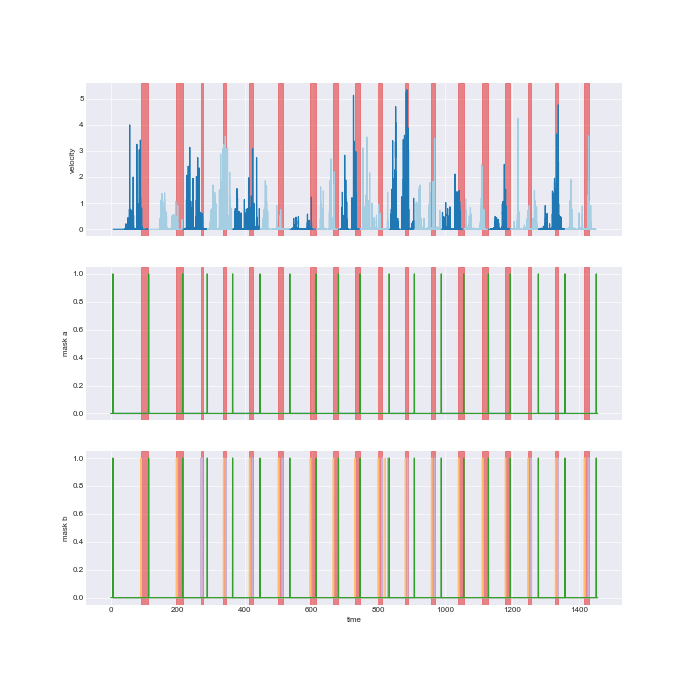

<IPython.core.display.Javascript object>


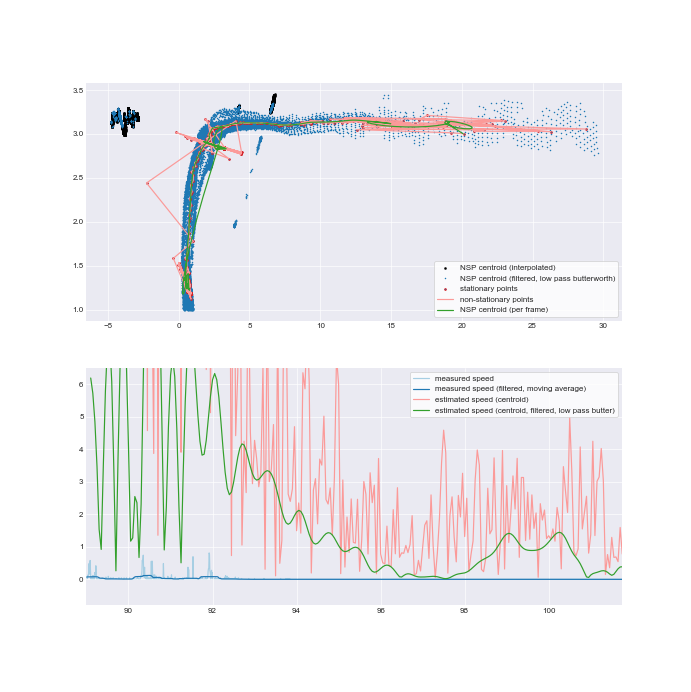

<IPython.core.display.Javascript object>


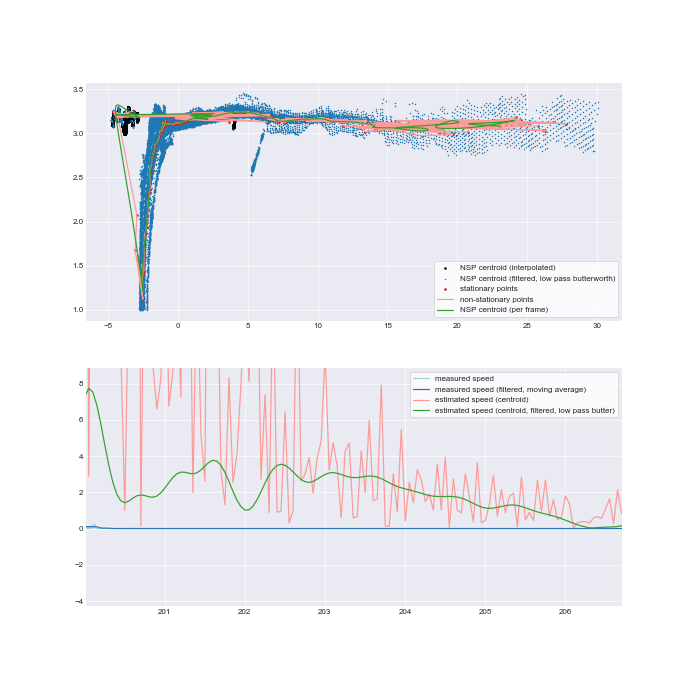

<IPython.core.display.Javascript object>


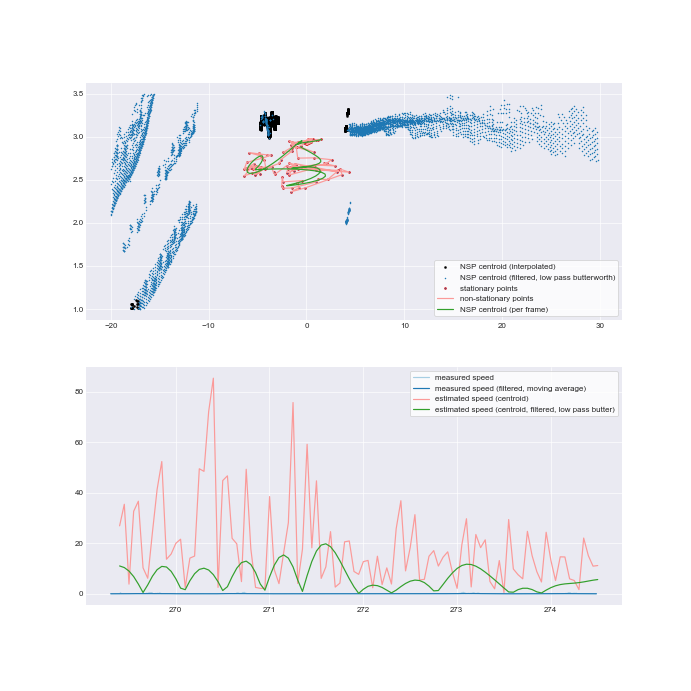

<IPython.core.display.Javascript object>


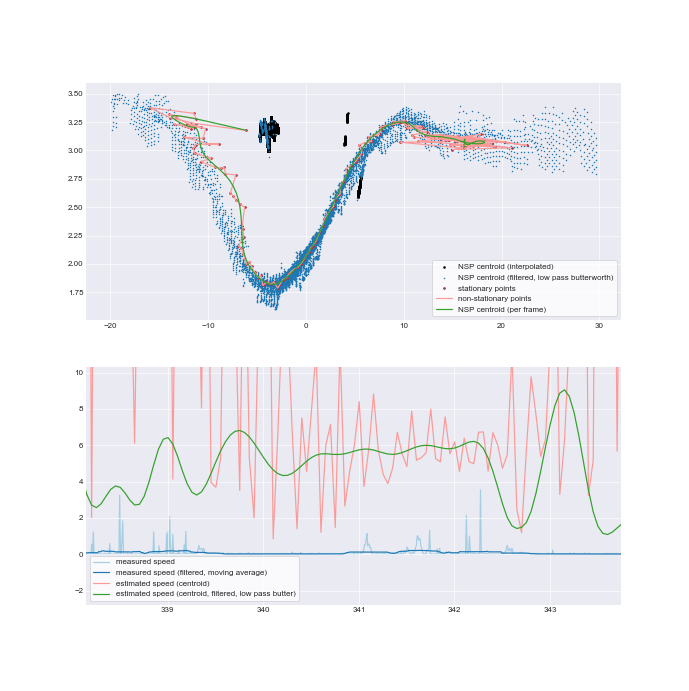

<IPython.core.display.Javascript object>


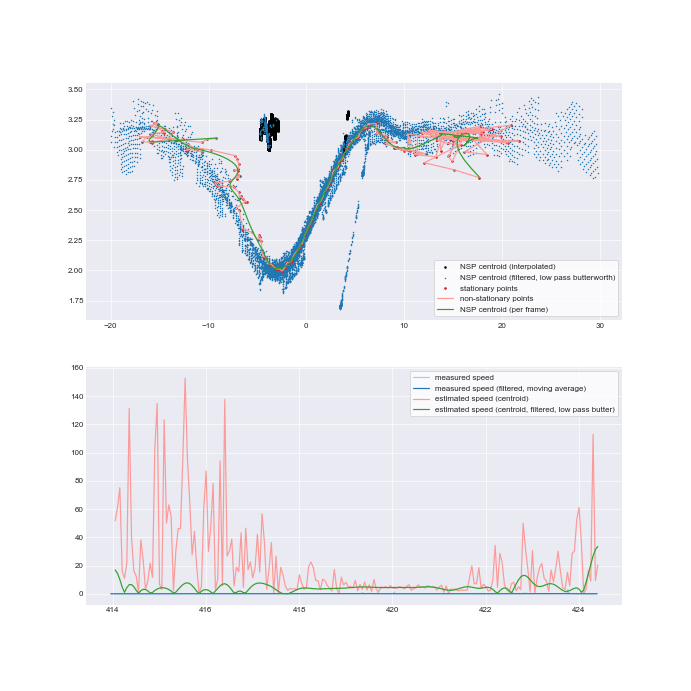

<IPython.core.display.Javascript object>


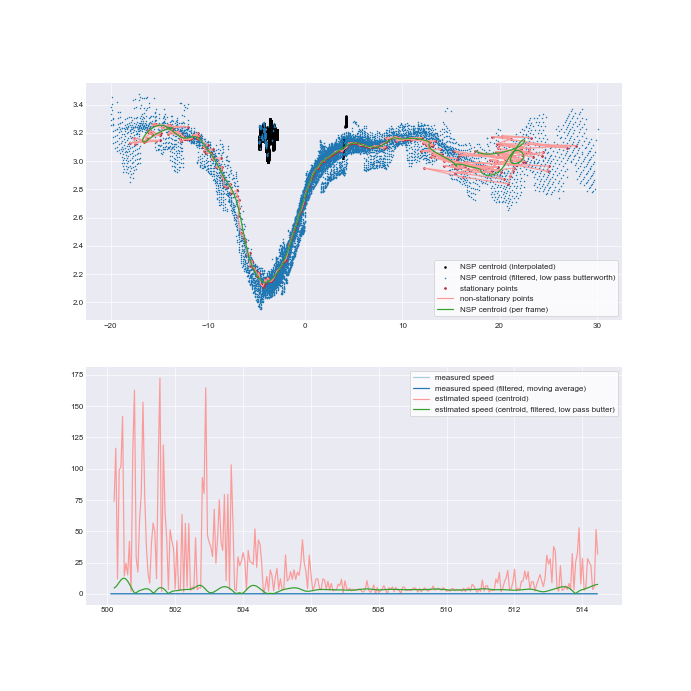

<IPython.core.display.Javascript object>


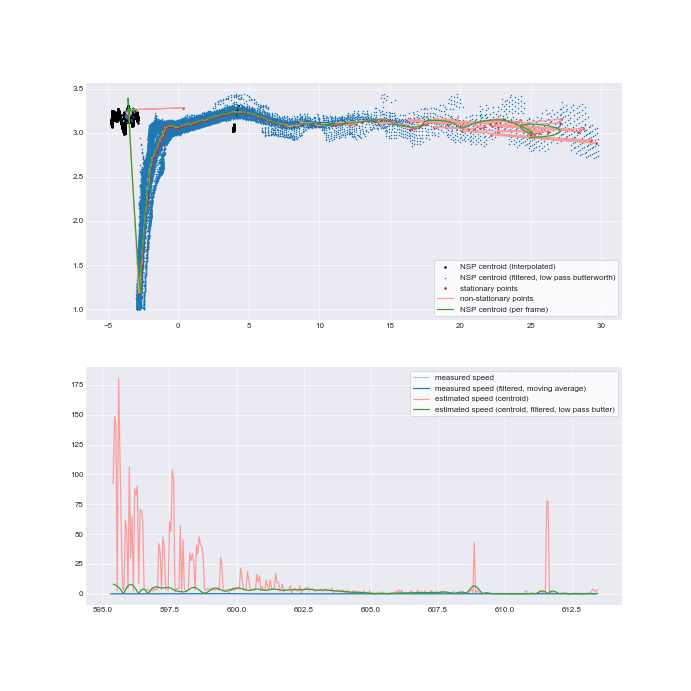

<IPython.core.display.Javascript object>


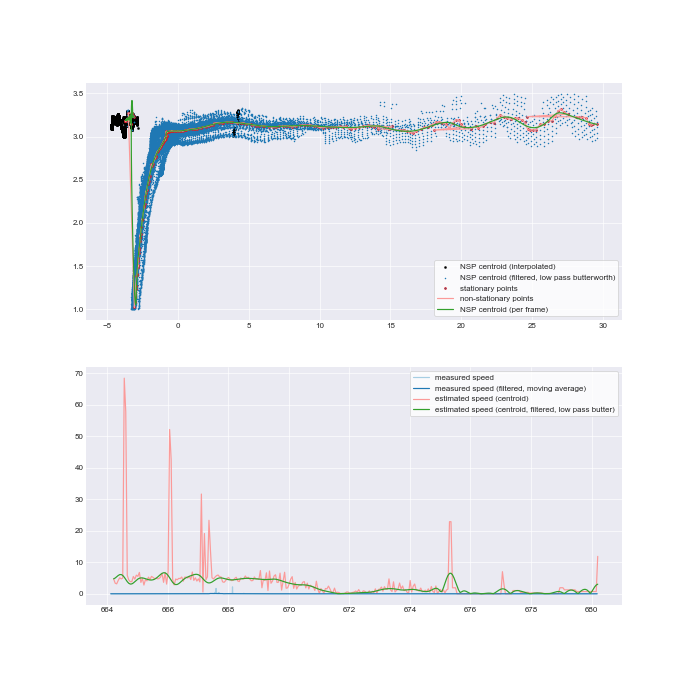

<IPython.core.display.Javascript object>


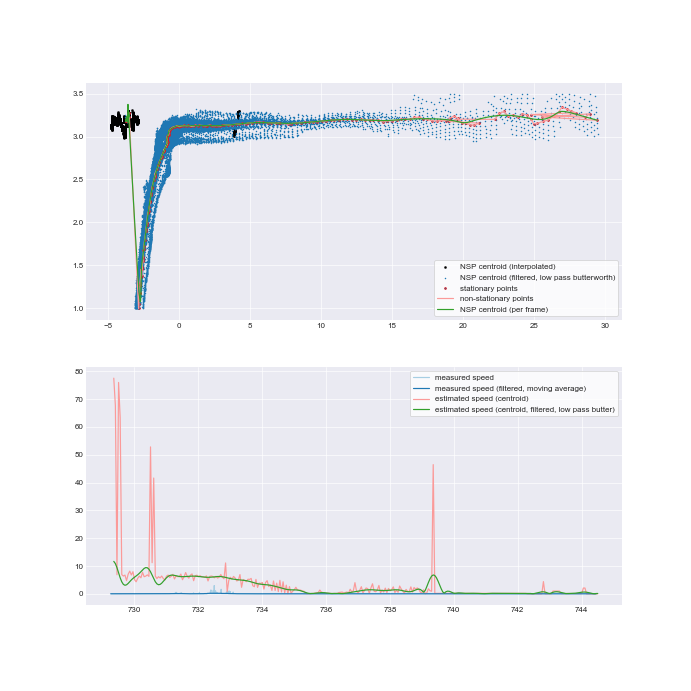

<IPython.core.display.Javascript object>


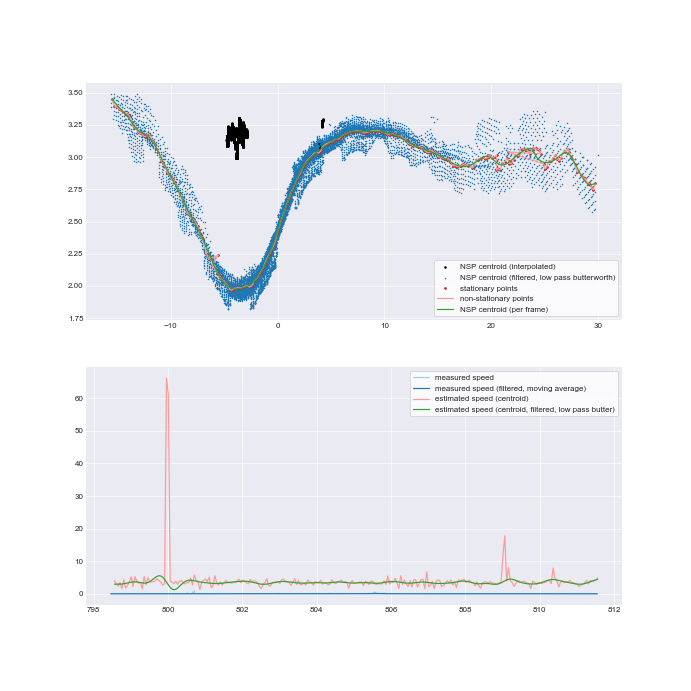

<IPython.core.display.Javascript object>


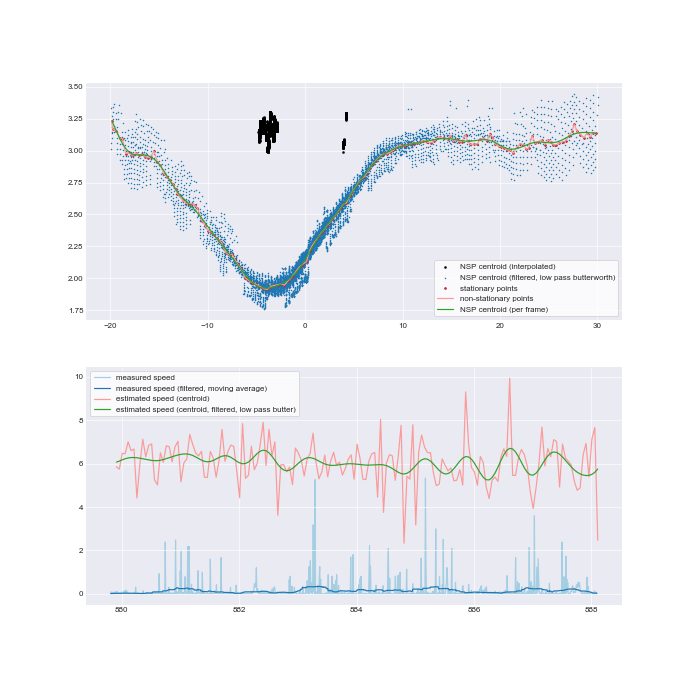

<IPython.core.display.Javascript object>


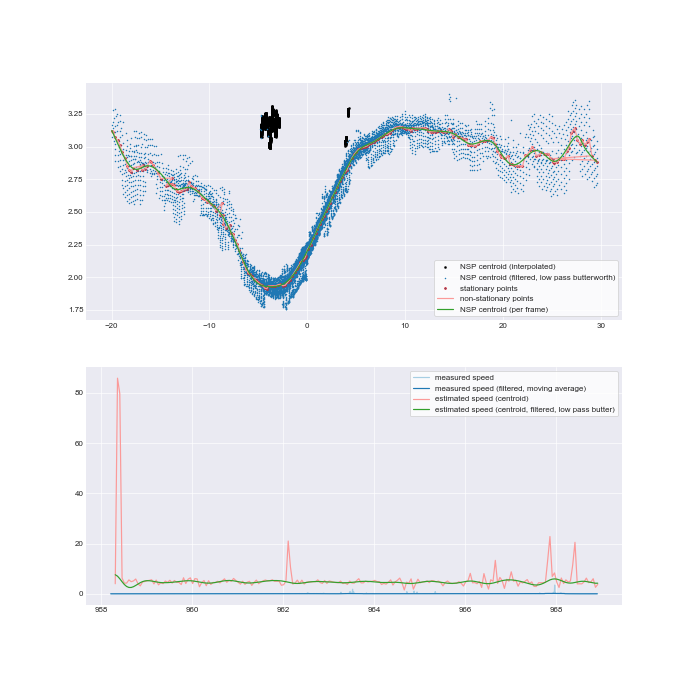

<IPython.core.display.Javascript object>


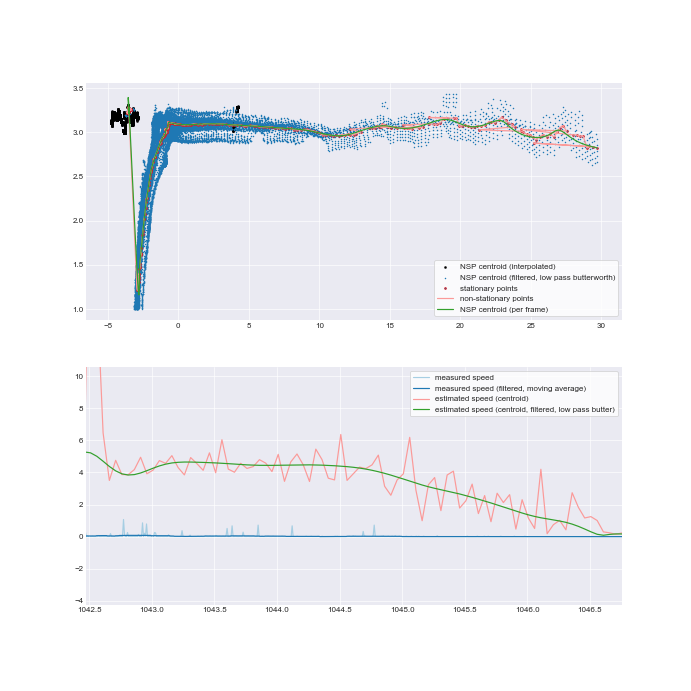

<IPython.core.display.Javascript object>


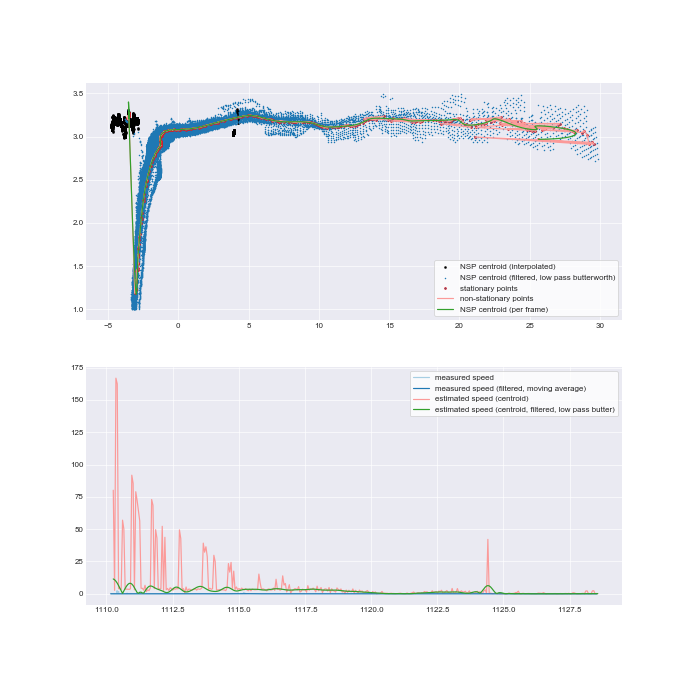

<IPython.core.display.Javascript object>


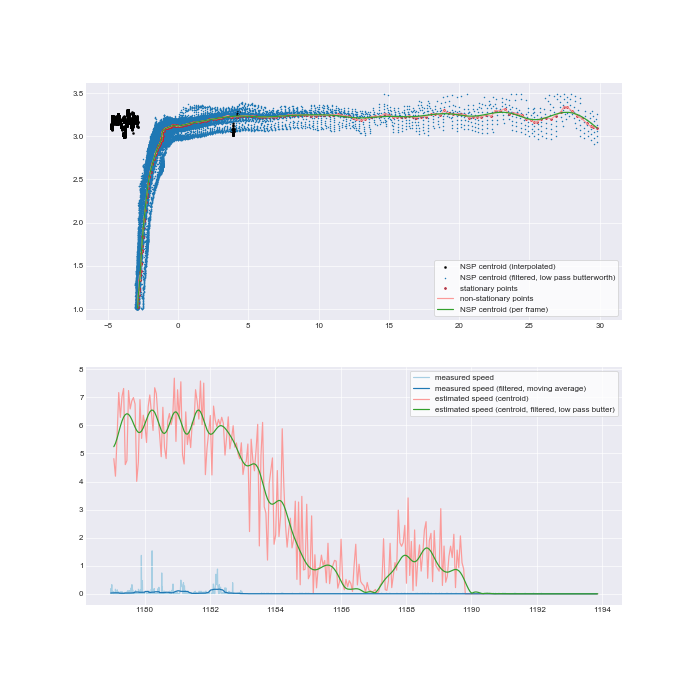

<IPython.core.display.Javascript object>


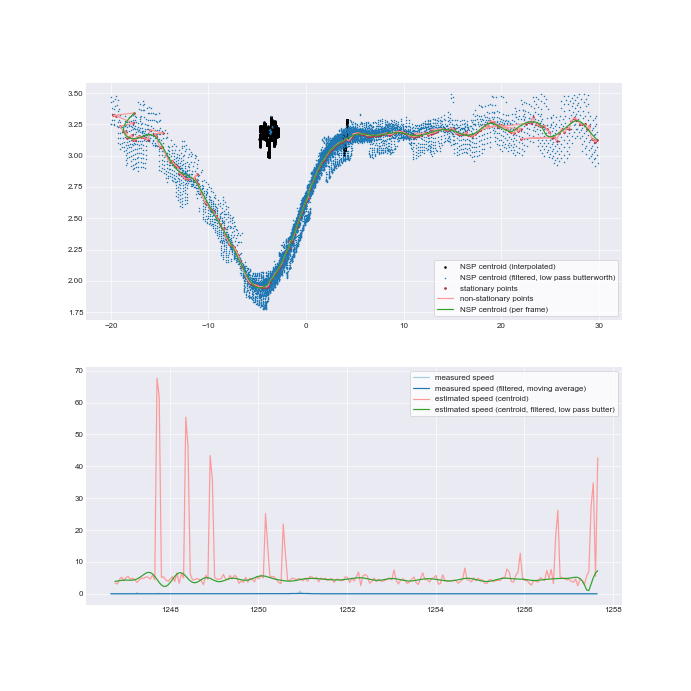

<IPython.core.display.Javascript object>


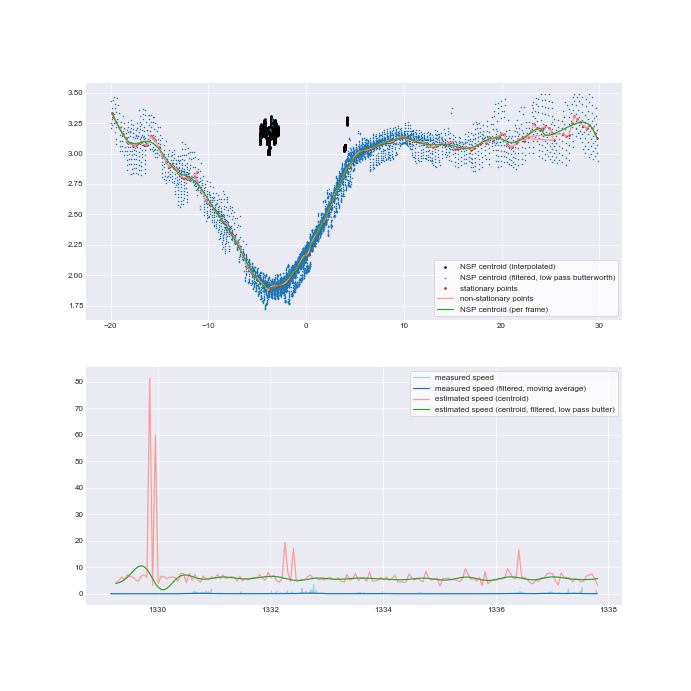

<IPython.core.display.Javascript object>


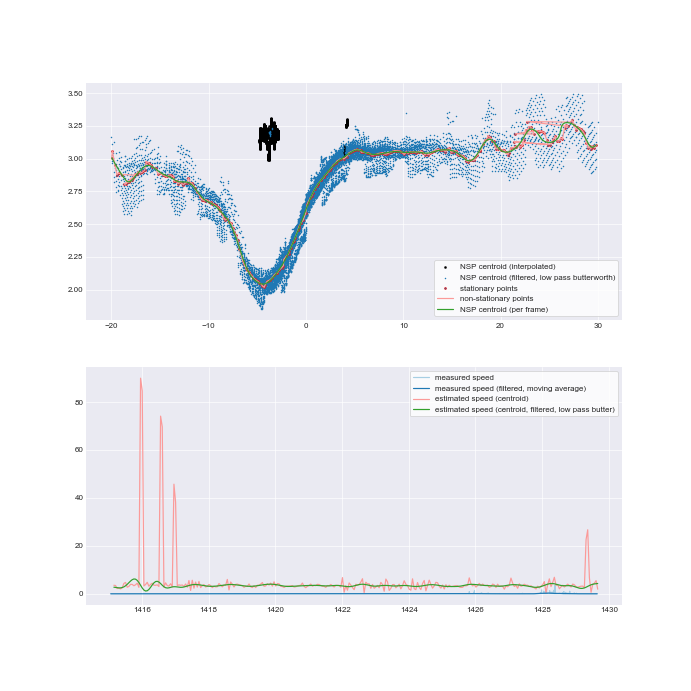

In [53]:
#records2[10]._calculate_trials2()

plt.close('all')
records2[10].plot_trial_detection(figsize=(12, 12))
for tr in records2[10].trials:
    tr.event.plot_trajectory(figsize=(12, 12))
plt.show()

In [44]:
plt.close('all')
r = records2[17]

#fig, ax = plt.subplots(figsize=(12, 12))
#ax.plot(r.bicycle.time, r.bicycle.sync)
#ax.plot(r.lidar.time, trial2.Trial2.mask_b(r.lidar))

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(*r.lidar[:150].cartesian(**trial2.VALID_BB))
ax.scatter(*r.lidar[:150].cartesian(**trial2.OBSTACLE_BB))

plt.show()

IndexError: list index out of range

8


<IPython.core.display.Javascript object>


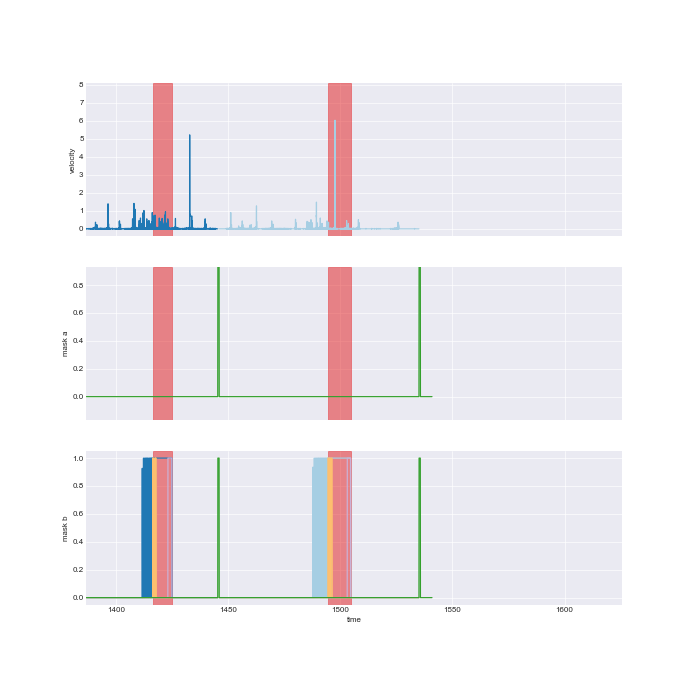

9


<IPython.core.display.Javascript object>


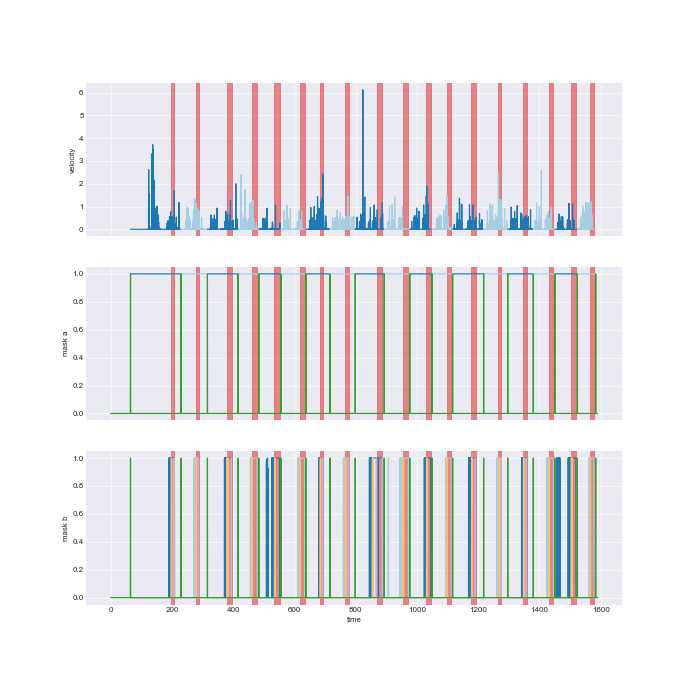

In [24]:
%matplotlib notebook

plt.close('all')

for i, r in enumerate(records2[8:10], 8):
    print(i)
    try:
        r.plot_trial_detection(figsize=(12, 12))
    except AttributeError:
        r._calculate_trials2()
        r.plot_trial_detection(figsize=(12, 12))
    plt.show()